<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/time_series_analysis/fpProphet_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from fbprophet import Prophet

In [3]:
df = pd.read_csv('Miles_Traveled.csv')

In [4]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [6]:
df.columns = ['ds','y']

df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


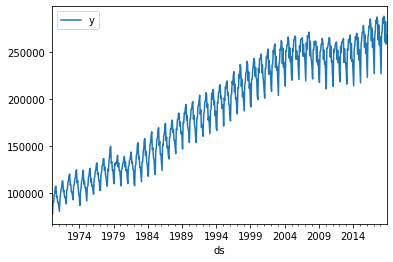

In [8]:
df.plot(x='ds',y='y')

In [9]:
len(df)

588

In [10]:
train = df.iloc[:576]
test = df.iloc[576:]

In [12]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263457.725002,273871.145976,286169.232492,263398.009413,263525.294313,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,0.0,0.0,0.0,279901.369516
584,2018-09-01,263600.413936,255879.502016,267391.383296,263516.820016,263696.297021,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,0.0,0.0,0.0,261926.128674
585,2018-10-01,263738.500000,263627.688958,275097.520633,263618.767351,263878.731643,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,0.0,0.0,0.0,269039.499421
586,2018-11-01,263881.188934,249885.798396,261209.922954,263725.019650,264071.378069,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,0.0,0.0,0.0,255666.543633
587,2018-12-01,264019.274999,251125.388625,262746.622024,263817.540117,264243.327895,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,0.0,0.0,0.0,257094.193073


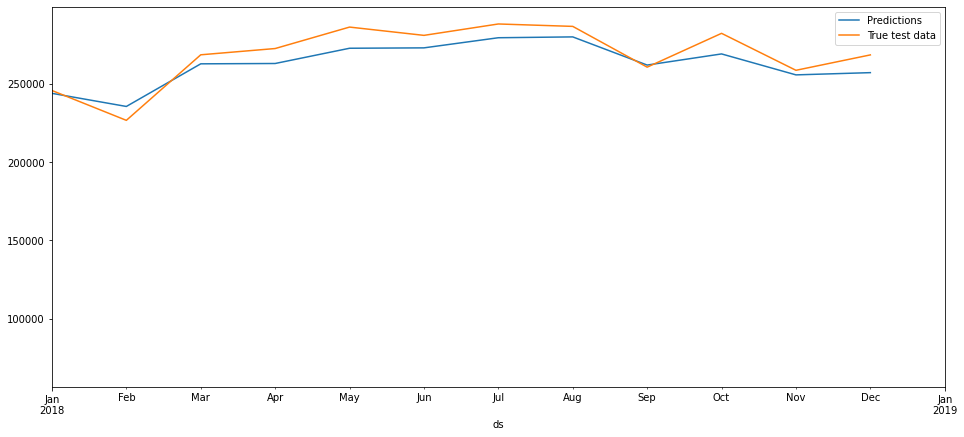

In [15]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(16,7))
test.plot(x='ds',y='y',label='True test data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [16]:
from statsmodels.tools.eval_measures import rmse

In [17]:
predictions = forecast.iloc[-12:]['yhat']

In [18]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [19]:
predictions

576    243890.540695
577    235518.185920
578    262721.044615
579    262926.543476
580    272653.963220
581    272904.801470
582    279365.372083
583    279901.369516
584    261926.128674
585    269039.499421
586    255666.543633
587    257094.193073
Name: yhat, dtype: float64

In [20]:
rmse(predictions,test['y'])

8588.50451989775

In [21]:
test.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    268739.666667
dtype: float64

In [22]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [25]:
#initial
initial = 5 * 365
initial = str(initial) + ' days' # exactly required in this format to work with fbProphet


In [26]:
initial

'1825 days'

In [27]:
#period
period = 5 * 365
period = str(period) + ' days'

In [28]:
period

'1825 days'

In [29]:
#horizon
horizon = 365
horizon = str(horizon) + ' days'

In [30]:
horizon

'365 days'

In [31]:
df_cd = cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [32]:
df_cd.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087478,106941.473739,109899.598228,102445.0,1976-12-11
1,1977-02-01,102996.111557,101588.292256,104390.127076,102416.0,1976-12-11
2,1977-03-01,118973.318267,117597.511422,120413.259276,119960.0,1976-12-11
3,1977-04-01,120612.923861,119051.277599,121950.793473,121513.0,1976-12-11
4,1977-05-01,127883.031986,126427.998109,129352.072659,128884.0,1976-12-11


In [33]:
len(df_cd)

108

In [34]:
performance_metrics(df_cd)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.430030e+07,4929.533140,4534.578066,0.027790,0.023419,0.4
1,53 days,2.180221e+07,4669.283718,4269.242480,0.025045,0.023419,0.4
2,54 days,1.835927e+07,4284.771500,3749.319270,0.020183,0.022331,0.5
3,55 days,2.318231e+07,4814.801050,4262.593972,0.023194,0.023419,0.4
4,57 days,2.101189e+07,4583.872792,4000.766561,0.021482,0.022331,0.5
...,...,...,...,...,...,...,...
94,360 days,1.833685e+07,4282.155252,3750.317263,0.019550,0.019595,0.5
95,361 days,1.744517e+07,4176.741529,3472.704963,0.018164,0.018940,0.5
96,362 days,3.175299e+07,5634.978870,4397.649029,0.021959,0.024754,0.4
97,364 days,3.001684e+07,5478.762932,4235.776363,0.021356,0.021737,0.5


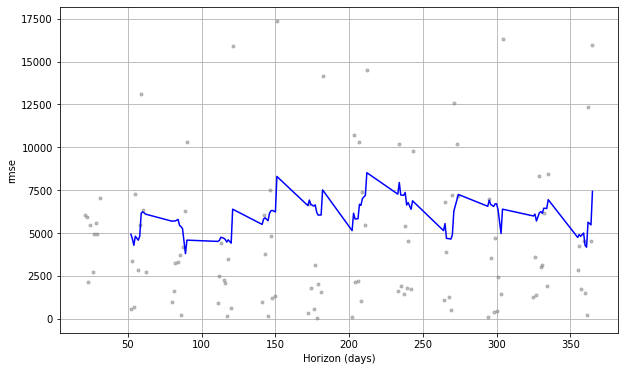

In [36]:
plot_cross_validation_metric(df_cd,metric='rmse');